#Working with Grids and Graphs

In [1]:
import numpy as np

In [43]:
m,n = (4,4) #Grid Size
grid = np.zeros([m, n])
holes = [(3,0), (1,1), (1,3), (2,3)]
for hole in holes:
    grid[hole] = 1
grid

array([[0., 0., 0., 0.],
       [0., 1., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [44]:
#Actions:          ◀️LEFT=0, 🔽DOWN=1, ▶️RIGHT=2, 🔼UP=3
#possible_actions = [(-1, 0),  (0, -1),    (1, 0),   (0, 1)] #Considerando o Plano Cartesiano, com origem (0,0) no centro. (Usado no Frozen Lake)
possible_actions  = [(0, -1),   (1, 0),    (0, 1),   (-1, 0)] #Considerando Matrizes, com origem (0,0) em Cima-Esquerda.

#Creating an Adjacency Matrix from a Grid, given possible actions

In [83]:
adjMat = np.zeros([m*n, m*n])
adjMat

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [84]:
#Creating nodes
nodes = {}
m,n = grid.shape
for i in range(m):
    for j in range(n):
        idx  = i*n+j
        node = (i, j)
        nodes[idx] = node
nodes

{0: (0, 0),
 1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (1, 0),
 5: (1, 1),
 6: (1, 2),
 7: (1, 3),
 8: (2, 0),
 9: (2, 1),
 10: (2, 2),
 11: (2, 3),
 12: (3, 0),
 13: (3, 1),
 14: (3, 2),
 15: (3, 3)}

In [85]:
#Creating edges based on actions
edges = []
m,n = grid.shape
for idx in nodes:
    i, j = nodes.get(idx)

    #Checking Holes for Frozen-Lake
    if grid[i, j] == 1:
        continue

    for action in possible_actions:
        x, y = action
        new_x = i + x
        new_y = j + y
        
        #Checking matrix boundaries
        if (new_x < 0) or (new_x > m-1) or (new_y < 0) or (new_y > n-1):
            continue
        #Checking Holes for Frozen-Lake
        if grid[new_x, new_y] == 1:
            #adjMat[i*n+j, new_x*n+new_y] = -1 #Activate this line to see the "Holes"
            continue
        
        #If everything is ok until now the Edge is created between (i,j) and (new_x, new_y)
        adjMat[i*n+j, new_x*n+new_y] = 1 #The number 1 means that there is a connection of length 1 (All weights are the same, since it is a grid)
        edges.append((i*n+j, new_x*n+new_y))

In [86]:
#Visualizing Edges
edges

[(0, 4),
 (0, 1),
 (1, 0),
 (1, 2),
 (2, 1),
 (2, 6),
 (2, 3),
 (3, 2),
 (4, 8),
 (4, 0),
 (6, 10),
 (6, 2),
 (8, 9),
 (8, 4),
 (9, 8),
 (9, 13),
 (9, 10),
 (10, 9),
 (10, 14),
 (10, 6),
 (13, 14),
 (13, 9),
 (14, 13),
 (14, 15),
 (14, 10),
 (15, 14)]

In [101]:
#Visualizing Adjacency Matrix
adjMat.astype(int).tolist()

[[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]

<AxesSubplot: >

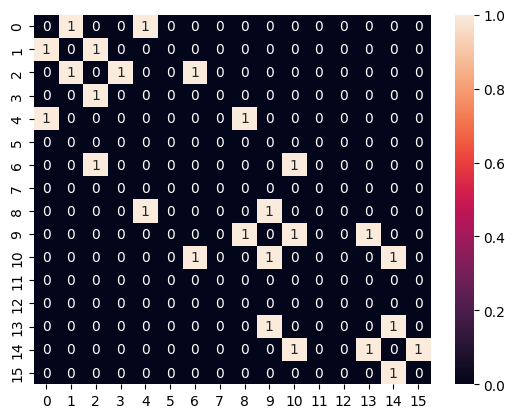

In [87]:
#Visualizing Adjacency Matrix
import pandas as pd
import seaborn as sns

df = pd.DataFrame(adjMat)
sns.heatmap(df, annot=True)

#Visualing Graphs

In [79]:
#Reference: https://www.geeksforgeeks.org/visualize-graphs-in-python/
#Reference: https://stackoverflow.com/questions/35109590/how-to-graph-nodes-on-a-grid-in-networkx
import networkx as nx 
import matplotlib.pyplot as plt 

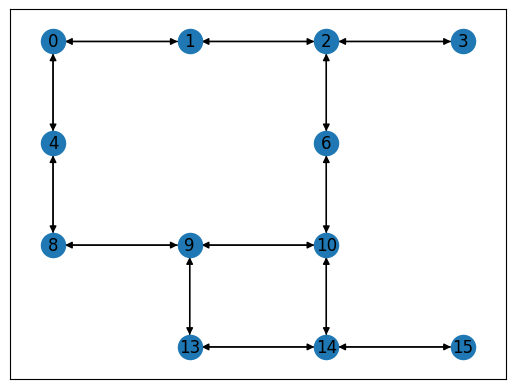

In [99]:
G = nx.DiGraph()
G.add_edges_from(edges) #define G

fixed_positions = nodes
fixed_nodes = fixed_positions.keys()
flipped_pos = {node: (y,-x) for (node, (x,y)) in fixed_positions.items()}
pos = nx.spring_layout(G, pos=flipped_pos, fixed=fixed_nodes)
nx.draw_networkx(G, pos)
plt.show()